# Homework 3

This homework will explore linear regression and resampling techniques by analyzing data from a database of glaciers. The database is *Glatilda* for [*Glacier Ice Thickness Database*](!https://www.gtn-g.ch/data_catalogue_glathida/).

1. Data prep (5 points)
2. Mapping (10 points)
3. Correlations between parameters (5 points)
4. Linear regression and resampling techniques (10 points)

## 1. Data Prep (5 points total)

### a) Download data (1 point) 
The database is saved on a GitLab repository that you may clone: https://gitlab.com/wgms/glathida.git



In [1]:
# answer
!git clone https://gitlab.com/wgms/glathida.git

Cloning into 'glathida'...
remote: Enumerating objects: 785, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 785 (delta 149), reused 233 (delta 143), pack-reused 533
Receiving objects: 100% (785/785), 139.83 MiB | 14.72 MiB/s, done.
Resolving deltas: 100% (460/460), done.
Checking out files: 100% (25/25), done.


### b) Import Python modules (1 point) 
Import pandas, geopandas, plotting, raster files,  numpy, netcdf

In [15]:
# solution
import pandas as pd
import geopandas as geopd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
import netCDF4 as nc
import requests
import io

### c) Read data (2 points)
Read the glacier data from the file ``glathida/data/glacier.csv`` into a pandas data frame, and decribe briefly the dataframe content and its first few lines.

In [4]:
# solution
t_path = "glathida/data/glacier.csv"
ds = pd.read_csv(t_path)
ds.head()

,id,survey_id,name,external_db,external_id,lat,lon,date,max_date,area,...,mean_thickness,mean_thickness_uncertainty,max_thickness,max_thickness_uncertainty,number_points,number_profiles,length_profiles,interpolation_method,flag,remarks
0,1,1,Isfallsglaciären,WGI,SE4B000E0006,67.91500,18.56800,1979-03-01,1979-03-31,1.3,...,72.0,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Rabots glaciär,WGI,SE4B000E1016,67.91000,18.49600,1979-03-01,1979-03-31,4.1,...,84.0,NaN,175.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN
2,3,1,Storglaciären,WGI,SE4B000E0005,67.90000,18.57000,1979-03-01,1979-03-31,3.1,...,99.0,NaN,250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2,South Cascade Glacier,WGI,US2M00264006,48.35698,-121.05735,1975-01-01,1975-12-31,2.0,...,99.0,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,3,Athabasca Glacier,FOG,7,52.17540,-117.28400,NaN,NaN,3.8,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Explore the data with visualization**
Before making any inference of models with the data, we will start by exploring basic correlations among parameters by plotting. In particular, we will focus on ``mean_thickness``, ``area``, ``mean_slope`` parameters.

### d) Remove bad data (1 point)

The database may contain Nans and other "bad" values (welcome to the data world!). First we will clean the data by removing nans. We are mostly interested in the thickness, area, and slope



In [27]:
#answer below 
ds_nonan = ds[['name','lat','lon','mean_thickness','area','mean_slope']]
ds_nonan = ds_nonan.dropna()
ds_nonan

,name,lat,lon,mean_thickness,area,mean_slope
32,Easton Glacier,48.750000,-121.830000,58.0,2.900,0.0
33,Lemon Creek Glacier,58.380000,-134.360000,66.0,11.700,0.0
34,Praviy Aktru,50.061340,87.697410,56.0,5.150,0.0
35,Maliy Aktru,50.049670,87.745520,86.0,2.840,0.0
36,Leviy Aktru,50.080080,87.690250,90.0,5.950,0.0
...,...,...,...,...,...,...
619,Blekumbreen,78.245480,16.064380,32.0,2.100,13.0
627,Tuyuksu (central),43.043653,77.080587,47.0,2.610,20.0
631,Aldegondabreen,77.971400,14.069100,65.0,6.737,6.0
745,Ariebreen,77.027200,15.485400,27.0,0.370,19.0


## 2. Mapping glaciers (10 points)

Make a global map of the glaciers. Use either of the tools we learned in class:
* Geopandas, DEMs from NetCDFfiles (see chapter 2.4)
* Pandas and Plotly (see chapter 2.2). You may need to transform some of the series into log-spaced values for better visualization.

## Option 2: Plotly

You may use plotly. For improved visibility, transform some of the data into log-spaced. You may add these transformed Series into the Pandas, and use them as input to plotly.

In [46]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'vscode' # writes as standalone html, 

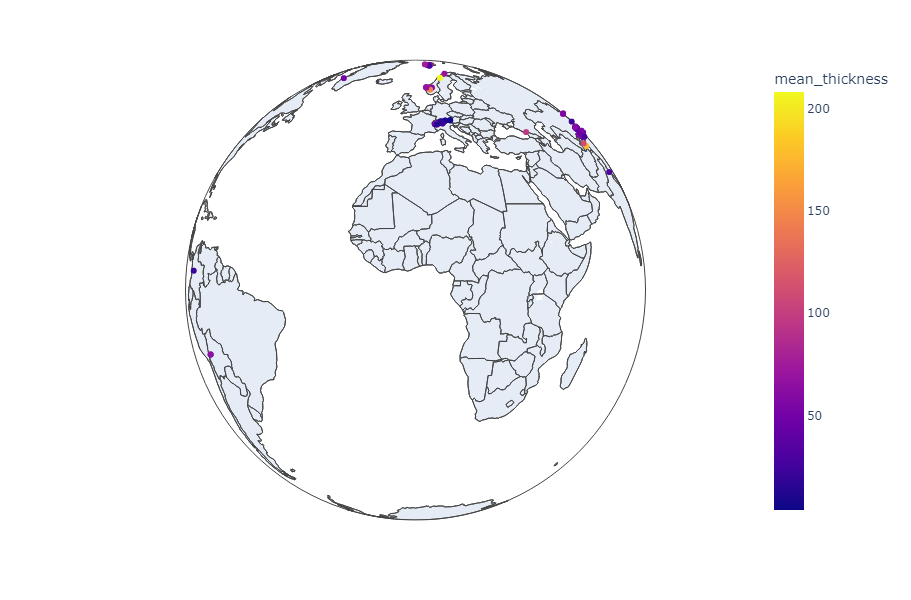

In [47]:
# solution
fig = px.scatter_geo(ds_nonan,
                     lat='lat',lon='lon', 
                     range_color=(ds_nonan.mean_thickness.min(),ds_nonan.mean_thickness.max()),
                     height=600, width=600,
                     color='mean_thickness',
                     hover_name="name",
                     hover_data=['name','mean_thickness','area','mean_slope']); #hover data shows the information when you click on the dots on the map
fig.update_geos(resolution=110, showcountries=True,projection_type="orthographic")

## 3. Correlations between data parameters ( 5 points total)

Make plots to vizualise the correlation, or lack of, between all three data. Make at least three plots.

### a) Basic correlations using Matplotlib (2 points)

Make 3 plots using matplotlib to visualize slope, mean_thickness, and area. Use logscale to see the correlatons.

__Tips__: 
* Use the function ``scatter`` to plot the values of mean thickness, mean slope, area, and latitude. 
* use one of the dataframe columns as a color using the argument ``c``. You can also vary the ``colormap`` using the argument ``cmap``. Help on colormaps can be found here: https://matplotlib.org/stable/tutorials/colors/colormaps.html. Be mindful of Color-Vision Deficient readers and read *Crameri, F., Shephard, G.E. and Heron, P.J., 2020. The misuse of colour in science communication. Nature communications, 11(1), pp.1-10. https://doi.org/10.1038/s41467-020-19160-7* (find it on the class Gdrive). You can add a third "data" by choosing a marker color that scales with an other parameter. For instance, try coloring your marker with the ``LAT`` parameter to look at systematic latitudinal trends from the equator to the poles.
* Do not forget to adjust fontsize, figure size (at least 10,8), grid, labels with units. ou may also explore the *logarithmic* correlations by mapping the axis from linear to logarithmic scale ``plt.xscale('log')``.

Text(0, 0.5, 'Mean thickness')

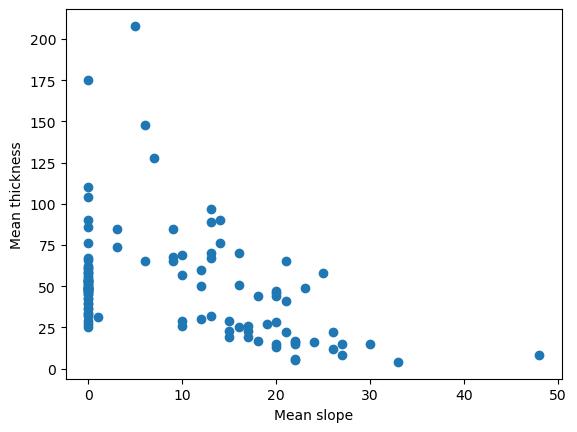

In [48]:
# Figure 1: Mean slope vs mean thickness
# solution
plt.scatter(ds_nonan.mean_slope, ds_nonan.mean_thickness)
plt.xlabel('Mean slope')
plt.ylabel('Mean thickness')

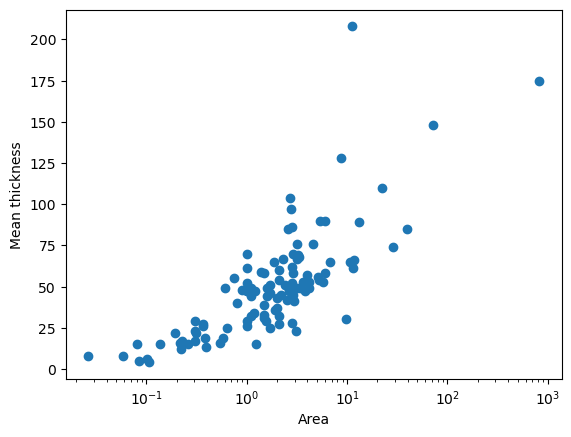

In [51]:
# Figure 2: area vs mean thickness
# solution
plt.scatter(ds_nonan.area, ds_nonan.mean_thickness)
plt.xlabel('Area')
plt.ylabel('Mean thickness')
plt.xscale('log')

Text(0, 0.5, 'Slope')

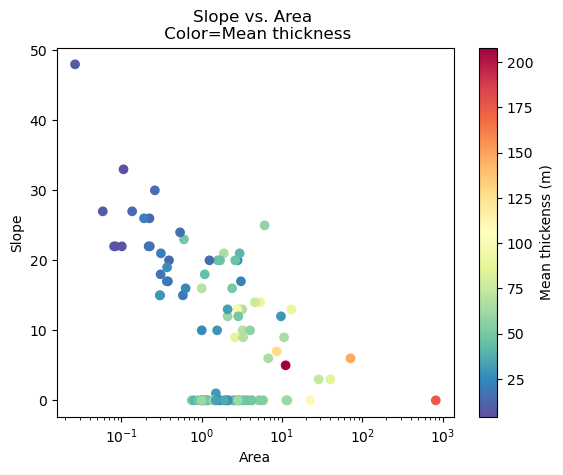

In [59]:
# Figure 3: slope and area
plt.title('Slope vs. Area \n Color=Mean thickness')
plt.scatter(ds_nonan.area, ds_nonan.mean_slope,c=ds_nonan.mean_thickness, cmap='Spectral_r')
plt.colorbar(label='Mean thickenss (m)')
plt.xlabel('Area')
plt.xscale('log')
plt.ylabel('Slope')

### b) 3D Scatter plot using Plotly (1 point)

Use the plotly ``scatter_3d`` plot. Make sure to change the pandas series for log scales.

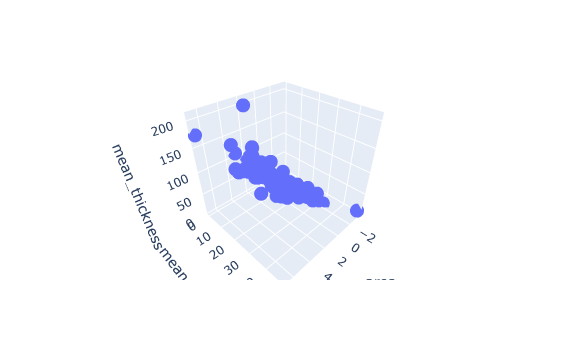

In [61]:
# solution
ds_nonan_log = ds_nonan.copy()
ds_nonan_log['area'] = np.log(ds_nonan.area)
px.scatter_3d(data_frame=ds_nonan_log, x='area',y='mean_slope',z='mean_thickness')

### c) Pandas Correlation function (1 point)

You may use Pandas functionalities to explore correlation between data. Use the function ``corr`` on the dataframe and the matplotlib function ``matshow`` to plot a heatmap of the correlations

([<matplotlib.axis.YTick at 0x7faefad399d0>,
 [Text(0, 0, 'log(Area)'), Text(0, 1, 'Slope'), Text(0, 2, 'Thickness')])

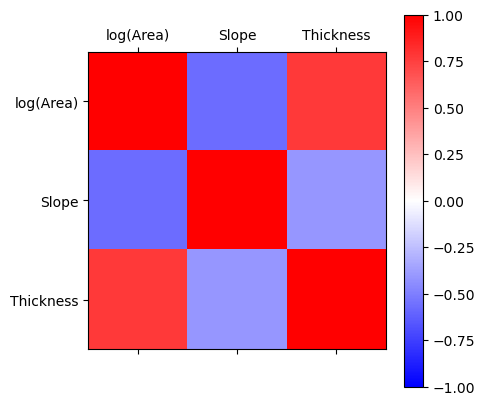

In [75]:
#solution
important_data = ds_nonan_log[['area','mean_slope','mean_thickness']]
plt.matshow(important_data.corr(), cmap='bwr',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(np.arange(0,3),('log(Area)','Slope','Thickness'))
plt.yticks(np.arange(0,3),('log(Area)','Slope','Thickness'))

### f) Seaborn Plotting (1 point)

Seaborn is a great python package for basic data anlytics. See documentation [here](!https://seaborn.pydata.org/).

<AxesSubplot: >

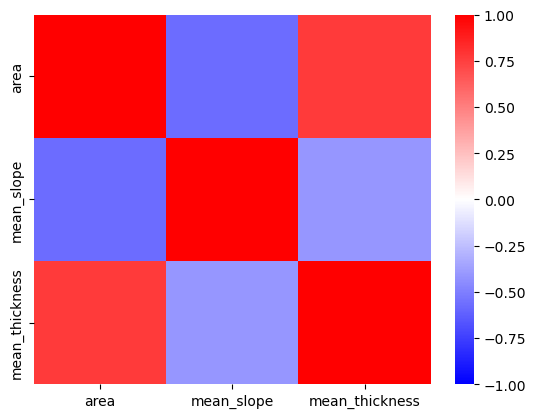

In [76]:
# solution
import seaborn as sns
sns.heatmap(important_data.corr(), cmap='bwr',vmin=-1,vmax=1)

Discuss the basic correlations among the data. Do these correction make sense when you think about the shapes of glaciers?

It makes sense to me that the mean thickness is positvely correlated with log(area), suggesting that larger glacier tends to be thicker. 
It also makes sense that the mean thickness is negatively correlated with slope, suggesting that a steep glacier tends to be thinner than a flat glacier. 

## 4. Linear Regression (10 points total counted in the next section)
You found from basic data visualization that the three parameters ``mean_slope``, ``mean_thickness``, and ``area`` are correlated. It does make physical sense because a *steep* glaciers is likely to be in the high mountains regions, hanging on the mountain walls, and thus be constrained, and conversely, a flat glacier is either at its valley, ocean terminus or on ice sheets.

### a) Simple linear regression (2 points)
We will now perform a regression between the parameters (or their log!). Linear regressions are models that can be imported from scikit-learn. Log/exp functions in numpy as ``np.log()`` and ``np.exp()``.
Remember that a linear regression is finding $a$ and $b$ knowing both $x$ and the data $y$ in $y = Ax +b$. We want to predict ice thickness from a crude estimate of the glacier area.

__Tips__: 
a. make sure that the dimensions are correct and that there is no NaNs and zeros.
b. Make sure to inport the scikit learn linear regression function and the error metrics.

In [85]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = important_data.area.to_numpy().reshape(-1,1)
print(x.shape)
y = important_data.mean_thickness.to_numpy().reshape(-1,1)
print(y.shape)
LR_model = LinearRegression()
LR_fit  = LR_model.fit(x,y)
a = LR_fit.coef_
b = LR_fit.intercept_
R2 = LR_model.score(x,y)
ypred = a*x+b

(110, 1)
(110, 1)


Make a plot of the data and the linear regression your performed

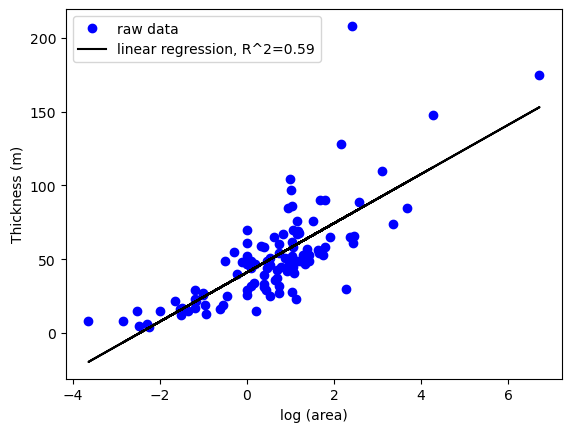

In [87]:
# solution
R2_str = "%.2f" %R2
plt.plot(x,y,'bo')
plt.plot(x,ypred,'k')
plt.xlabel('log (area)')
plt.ylabel('Thickness (m)')
plt.legend(['raw data','linear regression, R^2='+R2_str])

**Briefly comment on the quality of your fit and a linear regression (1 point)**

### b) Leave One Out Cross Validation linear regression (1 point)


Perform the LOCCV on the ``area`` and ``thickness`` values. Predict the ``thickness`` value knowing a ``area`` value. Use material seen in class. Make a plot of your fit.

a: 16.664982683005483 ; a-LOCCV: 16.664333102724527
b: 41.029329187759885 ; b-LOCCV: 41.028834620157156


Text(0.5, 1.0, 'Leave one out cross validation')

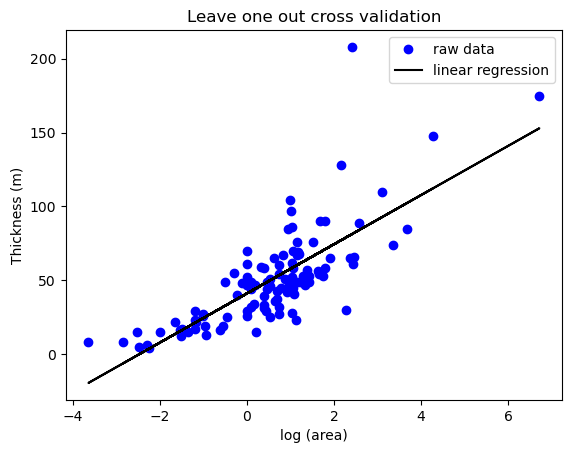

In [96]:
from sklearn.model_selection import LeaveOneOut
# solution
loo = LeaveOneOut()
area  = important_data.area.to_numpy().reshape(-1,1)
thick = important_data.mean_thickness.to_numpy().reshape(-1,1)

# initialize variables of interest
a_loccv = np.zeros(len(area))
b_loccv = np.zeros(len(area))
i = 0
for train_index, test_index in loo.split(area):
    area_train, area_val = area[train_index], area[test_index]
    thick_train, thick_val = thick[train_index], thick[test_index]
    
    # fit data on the training set
    regr = LinearRegression()
    regr.fit(area_train, thick_train)
    
    # coefficients
    a_loccv[i] = regr.coef_[0][0]
    b_loccv[i] = regr.intercept_[0]
    i = i + 1

# Calculate the mean
mean_a_loccv = np.mean(a_loccv)
mean_b_loccv = np.mean(b_loccv)
ypred_loccv = mean_a_loccv*x + mean_b_loccv
print('a:',a.squeeze(),'; a-LOCCV:',mean_a_loccv)
print('b:',b.squeeze(),'; b-LOCCV:',mean_b_loccv)

plt.plot(x,y,'bo')
plt.plot(x,ypred_loccv,'k')
plt.xlabel('log (area)')
plt.ylabel('Thickness (m)')
plt.legend(['raw data','linear regression'])
plt.title('Leave one out cross validation')

### c) Bootstrapping (1 point)

Perform the same analysis but using a bootstrapping technique. Output the mean and standard deviation of the slope. An illustration with a histogram  may help.

Mean of the bootstrap slope:  16.462280688193708
Std of the bootstrap slope:  1.646747292783818


Text(0, 0.5, 'Frequency')

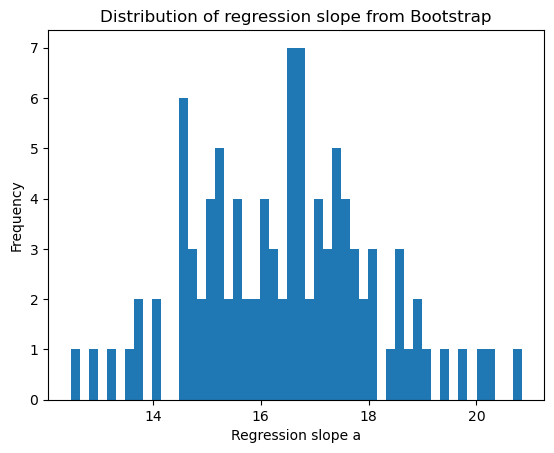

In [98]:
from sklearn.utils import resample
# solution

k=100

a_bootstrap = np.zeros(k)

i = 0
for iik in range(k):
    ii = resample(np.arange(len(area)), replace=True, n_samples=len(area))
    thick_b, area_b = thick[ii], area[ii] 
    
    # fit the data on training data
    regr = LinearRegression()
    regr.fit(area_b, thick_b)
    
    # coefficients
    a_bootstrap[i] = regr.coef_[0][0]
    i = i + 1
print('Mean of the bootstrap slope: ', np.nanmean(a_bootstrap))
print('Std of the bootstrap slope: ', np.nanstd(a_bootstrap))

plt.hist(a_bootstrap, 50)
plt.title('Distribution of regression slope from Bootstrap')
plt.xlabel('Regression slope a')
plt.ylabel('Frequency')

### d) Predict the thickness of a glacier (2 points)

Let assume that you measure a glacier of area 10 km$^2$. Can you use your bootstrap regression framework to provide a distribution of possible values of the ice thickness ? Output the mean and standard deviation of the predicted ice thickness.

In [107]:
# solution
k=100
x_example = np.log(10).reshape(-1,1)

ypred_bootstrap = np.zeros(k)
i = 0
for iik in range(k):
    ii = resample(np.arange(len(area)), replace=True, n_samples=len(area))
    thick_b, area_b = thick[ii], area[ii] 
    
    # fit the data on training data
    regr = LinearRegression()
    regr.fit(area_b, thick_b)
    
    # coefficients
    ypred_bootstrap[i] = regr.predict(x_example)
    i = i + 1

y_pred_bootstrap_mean = np.nanmean(ypred_bootstrap)
y_pred_bootstrap_std = np.nanstd(ypred_bootstrap)

Mean of predicted ice thickness:  78.77517254652055 m
Std of predicted ice thickness:  3.8505551149809367 m


Text(0, 0.5, 'Frequency')

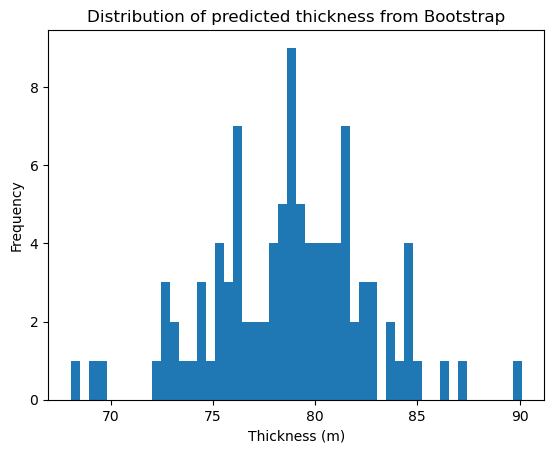

In [108]:
print('Mean of predicted ice thickness: ',y_pred_bootstrap_mean, 'm')
print('Std of predicted ice thickness: ',y_pred_bootstrap_std, 'm')

plt.hist(ypred_bootstrap, 50)
plt.title('Distribution of predicted thickness from Bootstrap')
plt.xlabel('Thickness (m)')
plt.ylabel('Frequency')